# Lab 1 - Arytmetyka komputerowa

In [1]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np


print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

Wersja Pythona:
3.8.6 (default, Jan 27 2021, 15:42:20) 
[GCC 10.2.0]
Wersja numpy: 1.20.1
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


### Zadanie 1. Sumowanie liczb pojedynczej precyzji

1. Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych w tablicy o N = 10^7 elementach. Tablica wypełniona jest tą samą wartością v z przedziału [0.1, 0.9] np. v = 0.53125.

In [2]:
def sum_nums(nums):
    result = float32(0)
    
    for num in numbers:
        result += num
    
    return result

val = float32(0.53125)
length = 10**7
numbers = [val]*length

sum_ = sum_nums(numbers)

print(f'sum: {sum_}')

sum: 5030840.5


2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak duży?

In [3]:
exact = 5312500
error = abs(exact - sum_)
rel_error = error/exact

print(f'error {error}')
print(f'relative error {rel_error:.2%}')

error 281659.5
relative error 5.30%


Otrzymany błąd wynika z niedokładności reprezentacji liczb zmiennoprzecinkowych w komputerze. Nie jest możliwa dokładna reprezentacja wszystkich liczb; nawet jeśli wartość w tablicy byłaby reprezentowana dokładnie, to przy sumowaniu sumy częściowe będą często obarczone błędem, który cały czas się kumuluje. Dodatkowo, przy rosnącej różnicy w rzędach między aktualną sumą a dodawaną wartością z tablicy, rośnie błąd względny.

3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

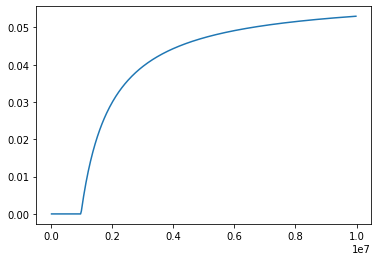

In [4]:
sum_ = float32(0)
errors = []
for i, num in enumerate(numbers):
    if i != 0 and i%25000 == 0:
        errors.append(abs(sum_ - i*val)/(i*val))
    sum_ += num

fig, ax = plt.subplots()
ax.plot([25000*i for i in range(1, length//25000)], errors)

Otrzymana funkcja ma charakter monotoniczny - jest niemalejąca. Od pewnego momentu błąd względny ściśle rośnie wraz z sumowaniem, wynika to ze zwiększającej się różnicy między sumowanymi liczbami i częstych błędów obcięcia. Wzrost błędu względnego nie jest liniowy, przez niewielką chwilę na początku jest on zerowy, następnie rośnie w szybkim tempie, po czym dalej rośnie, ale już łagodniej. 

4. Zaimplementuj rekurencyjny algorytm sumowania

In [5]:
# def sum_rec(nums):
#     if len(nums) == 1:
#         return nums[0]
#     return sum_rec(nums[:len(nums)//2]) + sum_rec(nums[len(nums)//2:])

def sum_rec(nums, left=0, right=None):
    if right is None:
        right = len(nums)-1
    if left == right:
        return nums[left]
    middle = (left + right) // 2
    return sum_rec(nums, left, middle) + sum_rec(nums, middle+1, right)

sum_r = sum_rec(numbers)
print(f'recursive sum: {sum_r}')

recursive sum: 5312500.0


5. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie zmalał?

In [6]:
error = abs(exact - sum_r)
rel_error = error/exact

print(f'error {error}')
print(f'relative error {rel_error}')

error 0.0
relative error 0.0


Błąd jest mniejszy, gdyż za każdym razem sumujemy ze sobą liczby, które niewiele (a często wcale) się od siebie różnią. W tej sytuacji zmniejszamy wpływ błędów obcięcia.

6.  Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [7]:
from time import time

start = time()
sum_nums(numbers)
end = time()
print(f'simple iterative function: {end - start}')

start = time()
sum_rec(numbers, 0, len(numbers)-1)
end = time()
print(f'recursive function: {end - start}')

simple iterative function: 0.4605271816253662
recursive function: 2.2249257564544678


Funkcja rekurencyjna działa dłużej, wiąże się to głównie z natury rekurencji - wielokrotne wywoływania funkcji i odkładanie zmiennych na stosie zajmuje więcej czasu niż obsługa pętli. Różnica w czasach jest widoczna, ale nie ogromna.

7.  Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.

In [8]:
nums = np.linspace(0, 10**30, 3, dtype=float32)
exact = 1.5e30
print(abs(exact - sum_rec(nums, 0, len(nums)-1)))

9.81290631666399e+22


W wybranym przeze mnie przykładzie błąd jest dodatni, lecz wynika to z bardzo dużego zakresu liczb. Im dalej od zera, tym liczby reprezentowalne są rozłożone coraz rzadziej, więc błąd wynika z niedokładności reprezentacji liczb w liście, a nie bezpośrednio z algorytmu. Algorytm rekurencyjny będzie działać gorzej, kiedy różnica między liczbami w tablicy będzie duża.

### Zadanie 2. Algorytm Kahana

0. Zaimplementuj algorytm sumowania Kahana.

In [9]:
def sum_kahan(nums):
    sum_ = float32(0)
    err = float32(0)

    for num in nums:
        y = num - err
        temp = sum_ + y
        err = (temp - sum_) - y
        sum_ = temp
        
    return sum_

1.  Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych jak w przypadku testów z Zadania 1.

In [10]:
exact = 5312500
error = abs(exact - sum_kahan(numbers))
rel_error = error/exact

print(f'error {error}')
print(f'relative error {rel_error}')

error 0.0
relative error 0.0


2.  Wyjaśnij dlaczego algorytm Kahana ma znacznie lepsze własności numeryczne? Do czego służy zmienna err?

Zadaniem zmiennej err jest akumulacja błędów, które powstałyby z powodu obcięcia. Gdy różnica w rzędach między liczbami jest duża, sumując te liczby brakuje nam miejsc aby pamiętać wszystkie cyfry, przez to część prawdziwej wartości zostaje  zapomniana. W algorytmie Kahana ważne jest, że najpierw wykonujemy (temp - sum_) co sprowadza liczbę do rzędu y, a potem odejmując y jesteśmy w stanie odzyskać stracone cyfry i zapamiętać je w zmiennej err.

3.  Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego dla tych samych danych wejściowych.

In [11]:
start = time()
sum_kahan(numbers)
end = time()
print(f'kahan algorithm: {end - start}')

start = time()
sum_rec(numbers)
end = time()
print(f'recursive algorithm: {end - start}')

kahan algorithm: 1.6492466926574707
recursive algorithm: 2.217742919921875


Z przeprowadzonego testu wynika, że algorytm Kahana jest szybszy od algorytmu rekurencyjnego, jednak różnica nie jest duża.

### Zadanie 3. Sumy częściowe

Rozważ sumy częściowe szeregu definiującego funkcję dzeta Riemanna oraz funkcję eta Dirichleta

In [12]:
def dzeta(s, n, direction, precision):
    result = precision(0)
    s = precision(s)
    
    if direction == 'forward':
        for k in range(1, n+1):
            result += precision(1/k**s)
    elif direction == 'backward':
        for k in range(n, 0, -1):
            result += precision(1/k**s)
    return result

def eta(s, n, direction, precision):
    result = precision(0)
    s = precision(s)
    
    if direction == 'forward':
        for k in range(1, n+1):
            if k%2 == 1:
                result += precision(1/k**s)
            if k%2 == 0:
                result -= precision(1/k**s)

    elif direction == 'backward':
        for k in range(n, 0, -1):
            if k%2 == 1:
                result += precision(1/k**s)
            if k%2 == 0:
                result -= precision(1/k**s)
    return result

1. Dla s = 2,3.6667,5,7.2,10 oraz n = 50,100,200,500,1000 oblicz wartości funkcji ζ(s) i η(s) w pojedynczej precyzji sumując w przód, a następnie wstecz. Porównaj wyniki z rezultatami uzyskanymi dla podwójnej precyzji. Dokonaj interpretacji otrzymanych wyników.

In [13]:
print('dzeta\n')
ss = [2, 3.6667, 5, 7.2, 10]
ns = [50, 100, 200, 500, 1000]

for s in ss:
    for n in ns:
        print(f's: {s}, n: {n}')
        for_32 = dzeta(s, n, "forward", float32)
        for_64 = dzeta(s, n, "forward", float64)
        print(f' forward:\n  float: {for_32}\n  double: {for_64}\n  error: {abs(for_32-for_64)}\n')

        back_32 = dzeta(s, n, "backward", float32)
        back_64 = dzeta(s, n, "backward", float64)
        print(f' backward:\n  float: {back_32}\n  double: {back_64}\n  error: {abs(back_32-back_64)}\n')

dzeta

s: 2, n: 50
 forward:
  float: 1.6251329183578491
  double: 1.625132733621529
  error: 1.8473632001914098e-07

 backward:
  float: 1.62513267993927
  double: 1.6251327336215293
  error: 5.368225930446613e-08

s: 2, n: 100
 forward:
  float: 1.634984016418457
  double: 1.6349839001848923
  error: 1.1623356477308278e-07

 backward:
  float: 1.6349838972091675
  double: 1.634983900184893
  error: 2.975725443832289e-09

s: 2, n: 200
 forward:
  float: 1.639946699142456
  double: 1.6399465460149971
  error: 1.5312745893503177e-07

 backward:
  float: 1.639946460723877
  double: 1.6399465460149973
  error: 8.529112038857534e-08

s: 2, n: 500
 forward:
  float: 1.6429359912872314
  double: 1.642936065514894
  error: 7.422766246101276e-08

 backward:
  float: 1.6429359912872314
  double: 1.6429360655148941
  error: 7.422766268305736e-08

s: 2, n: 1000
 forward:
  float: 1.6439348459243774
  double: 1.6439345666815615
  error: 2.7924281598146194e-07

 backward:
  float: 1.643934488296508

In [14]:
print('eta\n')
ss = [2, 3.6667, 5, 7.2, 10]
ns = [50, 100, 200, 500, 1000]

for s in ss:
    for n in ns:
        print(f's: {s}, n: {n}')
        for_32 = eta(s,n,"forward", float32)
        for_64 = eta(s,n,"forward",float64)
        print(f' forward:\n  float: {for_32}\n  double: {for_64}\n  error: {abs(for_32-for_64)}\n')

        back_32 = eta(s,n,"backward", float32)
        back_64 = eta(s,n,"backward",float64)
        print(f' backward:\n  float: {back_32}\n  double: {back_64}\n  error: {abs(back_32-back_64)}\n')

eta

s: 2, n: 50
 forward:
  float: 0.8222709894180298
  double: 0.8222710318260295
  error: 4.240799966748199e-08

 backward:
  float: 0.8222710490226746
  double: 0.8222710318260289
  error: 1.719664566302015e-08

s: 2, n: 100
 forward:
  float: 0.8224174976348877
  double: 0.8224175333741286
  error: 3.573924090005676e-08

 backward:
  float: 0.8224174976348877
  double: 0.8224175333741282
  error: 3.573924045596755e-08

s: 2, n: 200
 forward:
  float: 0.8224546909332275
  double: 0.822454595922551
  error: 9.501067654849038e-08

 backward:
  float: 0.822454571723938
  double: 0.8224545959225509
  error: 2.4198612891268567e-08

s: 2, n: 500
 forward:
  float: 0.8224653601646423
  double: 0.8224650374240963
  error: 3.2274054606595826e-07

 backward:
  float: 0.8224650621414185
  double: 0.8224650374240972
  error: 2.471732130082671e-08

s: 2, n: 1000
 forward:
  float: 0.8224668502807617
  double: 0.8224665339241114
  error: 3.163566503205928e-07

 backward:
  float: 0.8224665522575

Dla największych wartości s nie ma różnicy między sumowaniem w obu kierunkach. Dla mniejszych s błąd jest dużo mniejszy dla sumowania wstecz. Wynika to z tego, iż sumując od tyłu różnica między aktualną wartością sumy a dodawanym składnikiem jest mała. Sumując od przodu zaczynamy od największych wartości, przez co suma jest duża i jeszcze rośnie, a dodawane skłądniki maleją, zwiększa to błąd. Natomiast sumując od tyłu, suma jest mała i rośnie, a wraz z nią rosną dodawane składniki, co zmniejsza błąd.

### Zadanie 4. Błędy zaokrągleń i odwzorowanie logistyczne

a) Dla różnych wartości r (1≤r≤4) oraz kilku wybranych wartości x<sub>0</sub> przedstaw na wykresie wartości x<sub>n</sub> uzyskane po wielu iteracjach odwzorowania logistycznego (diagram bifurkacyjny). Dokonaj interpretacji otrzymanych wyników

In [15]:
def b_diagram(x_0, precision, r_start, r_stop):
    rs = np.linspace(start=r_start, stop=r_stop, num=278, dtype=precision)

    r_axis = []
    x_n = []

    for r in rs:
        x = x_0

        for _ in range(50):
            x = precision(r * x * (1 - x))

        for _ in range(50):
            x = precision(r * x * (1 - x))
            r_axis.append(r)
            x_n.append(x)

    plt.xlabel("r")
    plt.ylabel("x_n")
    plt.plot(r_axis, x_n, linestyle=' ', marker='.', markersize=2)


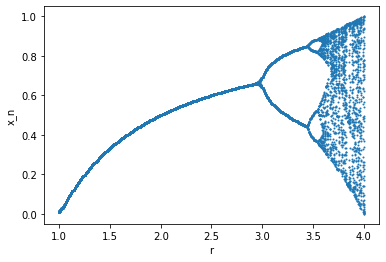

In [16]:
b_diagram(float32(0.1), float32, 1, 4)

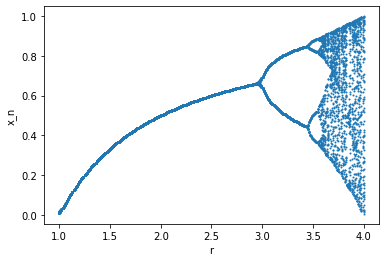

In [17]:
b_diagram(float32(0.53125), float32, 1, 4)

Dla r od 1 do 3 wartości x<sub>n</sub> zbiegają do konkretnej jednej liczby, różnej dla każdego r, zdaje się być to funkcja ciągła zmiennej r. W punkcie w okolicach r = 3 wykres rozdzielił się na dwie części. Widzimy, że wartości x<sub>n</sub> dla r z przedziału od 3 do około 3.4 oscylują między dwiema wartościami. Następnie w kolejnym charakterystycznym punkcie r wykres rozdziela się na 4 części. Dla r bliskich 4 funkcja wydaje się nie zbiegać do żadnej konkretnej wartości, jednak daje się zaobserwować biały pasek - miejsce, w którym są przyjmowane tylko konkretne wartości dla tegoż r. Dobór x_0 wydaje się nie mieć znaczenia, może jedynie wpływać na liczbę iteracji, po której sytuacja się stabilizuje.

b) Dla tych samych wartości x_0 oraz r (3.75 ≤ r ≤ 3.8) porównaj trajektorie obliczone z użyciem pojedynczej i podwójnej precyzji. Wyjaśnij otrzymane wyniki.

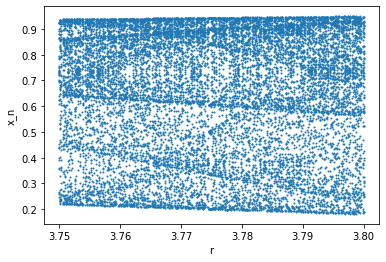

In [18]:
b_diagram(float32(0.001), float32, float32(3.75), float32(3.8))

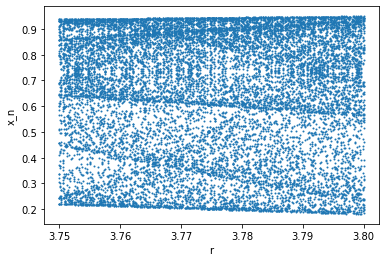

In [19]:
b_diagram(float64(0.001), float64, float64(3.75), float64(3.8))

cobweb plot:

In [20]:
def plot_trajectory(r, x_0, precision):
    xs = np.linspace(0, 1)
    plt.plot(xs, r * xs * (1 - xs), linewidth=2, color="gray")
    plt.plot([0, 1], [0, 1], linewidth=2, color="gray")

    x = x_0
    for i in range(100):
        y = precision(r * x * (1 - x))
        
        plt.plot([x, x], [x, y], color="steelblue")
        plt.plot([x, y], [y, y], color="steelblue")
        
        x = y

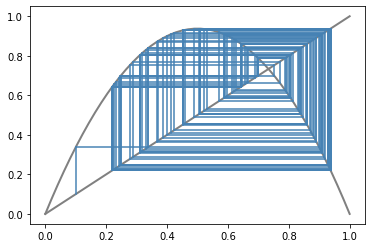

In [21]:
plot_trajectory(r=float32(3.75), x_0=float32(0.1), precision=float32)

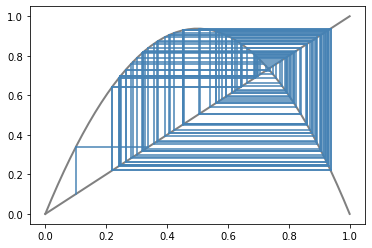

In [22]:
plot_trajectory(r=float64(3.75), x_0=float64(0.1), precision=float64)

Trajektorie różnią się w zależności od wybranej precyzji. Przyjmowane są inne wartości. Mała różnica w jednym miejscu prowadzi do dużego rozrzutu w dalszych operacjach, przez co wykresy znacznie się od siebie różnią.

c)  Dla r=4  i  różnych  wartości x_0 wyznacz  (pojedyncza  precyzja)  liczbę  iteracji potrzebnych do osiągnięcia zera. Przedstaw interpretację rezultatów.

In [23]:
def iterations_til_zero(r, x_0):
    x = x_0
    i = 0
    for i in range(10000):
        if x < 1e-8: return i
        x = float32(4*x*(1-x))
    return i

Text(0, 0.5, 'iterations')

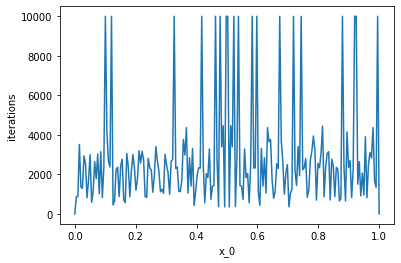

In [24]:
xs = np.linspace(0, 1, 200, dtype=float32)
plt.plot(xs, [iterations_til_zero(4, x) for x in xs])
plt.xlabel("x_0")
plt.ylabel("iterations")

Przyjąłem liczby równe zeru, jako te mniejsze od 10^-8 i maksimum iteracji na 10000. Wyniki wyglądają na bardzo losowe. Oznacza to, że niewiele zmieniając x_0 liczba potrzebnych iteracji może się bardzo zmienić, a co za tym idzie błędy związane z niedokładną reprezentacją liczb zmiennoprzecinkowych może znacznie wpływać na wyniki.

Możemy przypuszczać, że dla części z wartości x_0, dla których osiągnięta została maksymalna liczba iteracji, doszłoby do nieskończonej pętli, czyli wartości te dają cykl.

Marcin Hawryluk 18.03.2021